### Data Analysis

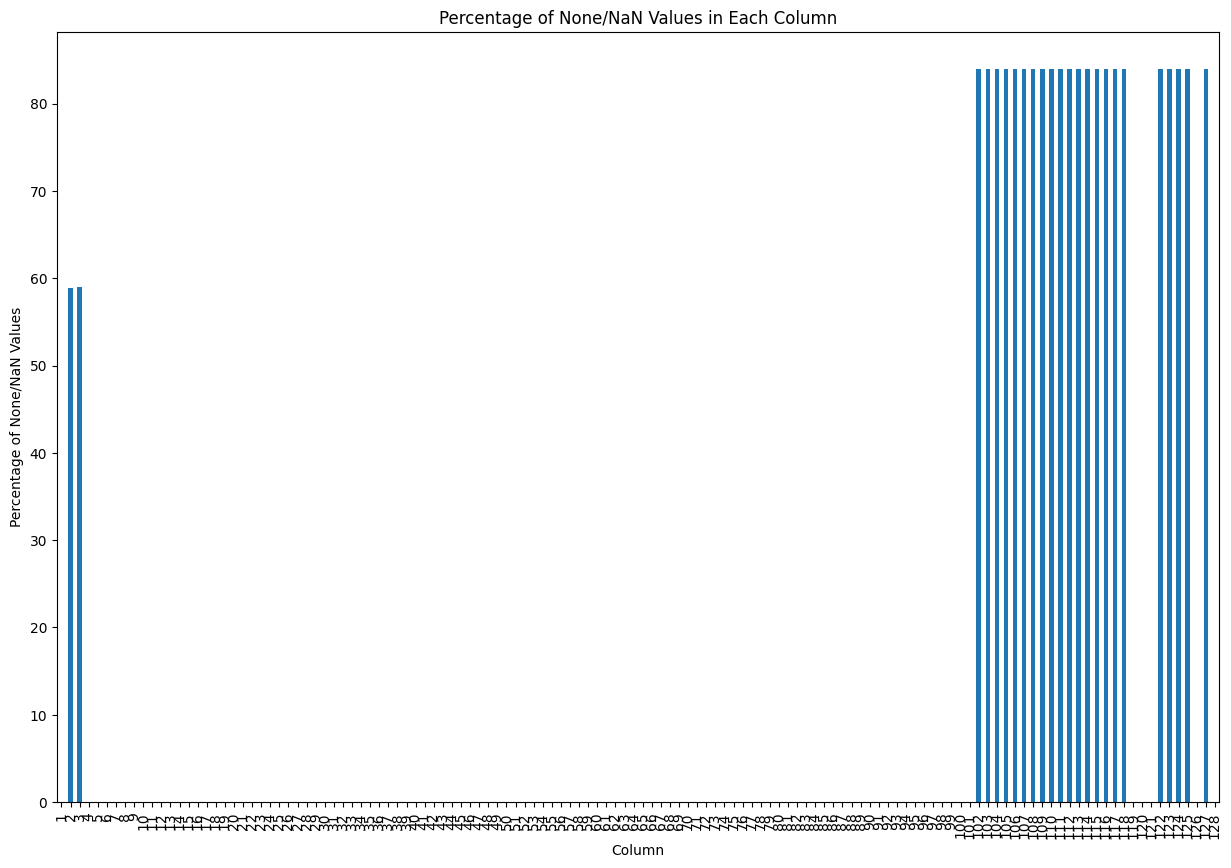

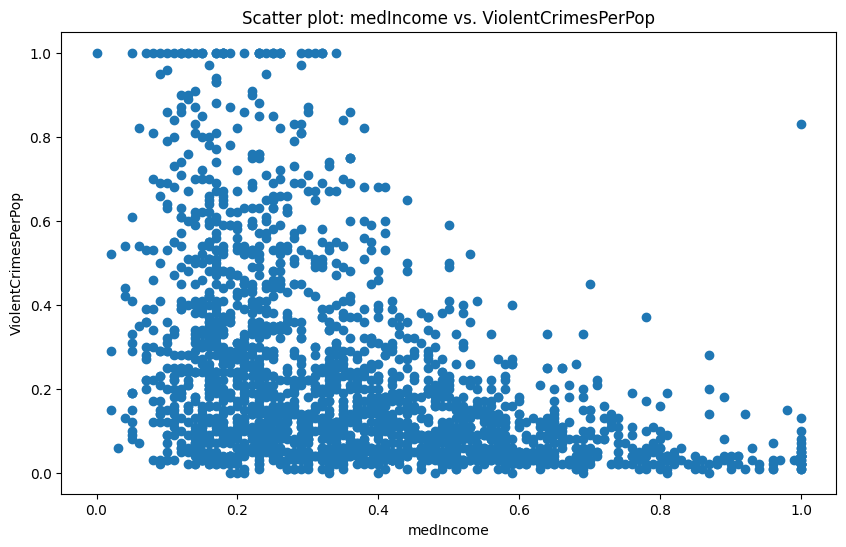


Types of data:
state                    int64
county                  object
community               object
communityname           object
fold                     int64
                        ...   
LemasPctPolicOnPatr     object
LemasGangUnitDeploy     object
LemasPctOfficDrugUn    float64
PolicBudgPerPop         object
ViolentCrimesPerPop    float64
Length: 128, dtype: object


In [5]:
import pandas as pd
from matplotlib import pyplot as plt

file_path = 'communities.data'
column_names = [
    'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack',
    'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up',
    'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
    'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
    'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
    'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf',
    'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
    'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
    'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
    'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
    'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
    'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos',
    'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ',
    'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg',
    'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85',
    'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq',
    'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack',
    'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
    'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy',
    'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop'
]

data = pd.read_csv(file_path, names=column_names)

# '?' to NaN
data.replace('?', pd.NA, inplace=True)

none_frequency = data.isna().mean() * 100

# Plot of Nans
plt.figure(figsize=(15, 10))
none_frequency.plot(kind='bar')
plt.title('Percentage of None/NaN Values in Each Column')
plt.xlabel('Column')
plt.ylabel('Percentage of None/NaN Values')
plt.xticks(range(len(none_frequency)), [str(i + 1) for i in range(len(none_frequency))], rotation=90)
plt.show()

# Scatter plot for 'medIncome' i 'ViolentCrimesPerPop'
plt.figure(figsize=(10, 6))
plt.scatter(data['medIncome'], data['ViolentCrimesPerPop'])
plt.title('Scatter plot: medIncome vs. ViolentCrimesPerPop')
plt.xlabel('medIncome')
plt.ylabel('ViolentCrimesPerPop')
plt.show()

# Show types of data
print("\nTypes of data:")
print(data.dtypes)

### Data Preparation

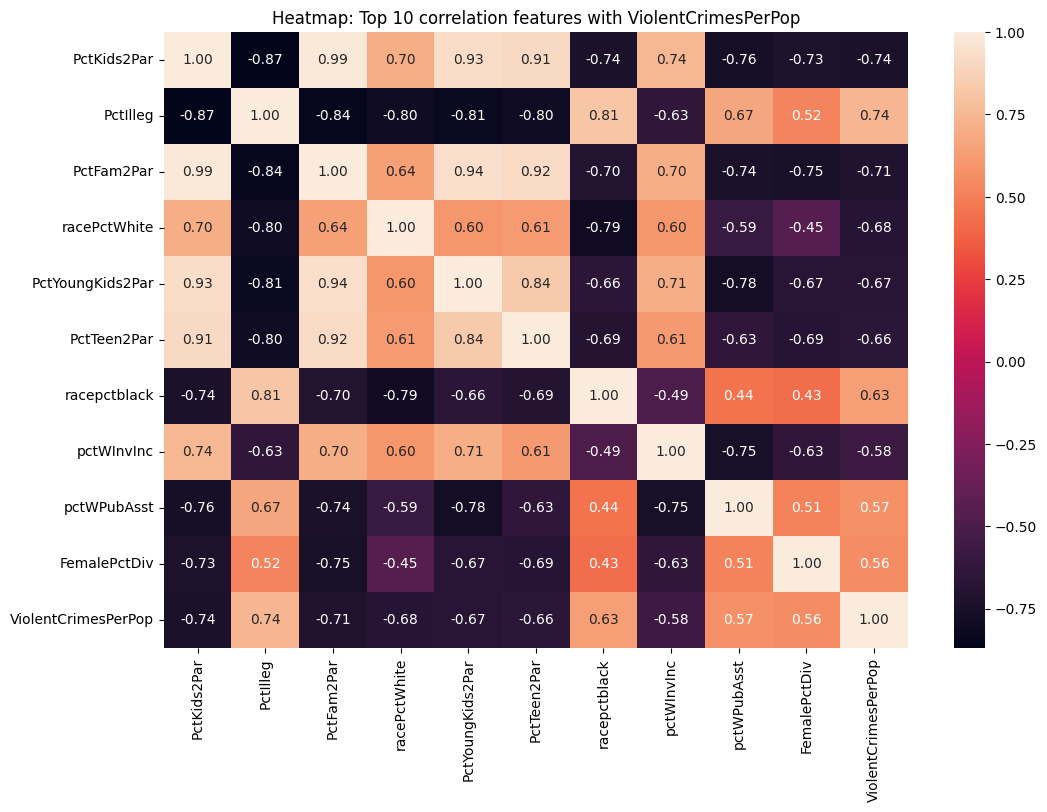

Dropped columns: communityname, fold, ['county', 'community', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop']
Numbers of dropped columns: 26


In [6]:
from sklearn.model_selection import train_test_split
import seaborn as sns
# Drop column 'communityname' and 'fold'
data = data.drop('communityname', axis=1)
data = data.drop('fold', axis=1)

# Change to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Dropping columns with missing data
threshold_for_missing_data = 0.5
missing_values = data.isna().sum()
columns_to_drop = missing_values[missing_values > len(data) * threshold_for_missing_data].index
data_cleaned = data.drop(columns=columns_to_drop)

# Correlation matrix
final_feature = 'ViolentCrimesPerPop'

correlation_with_final = data_cleaned.corrwith(data_cleaned[final_feature]).abs()

# Top 10 features
top_features = correlation_with_final.sort_values(ascending=False).head(11).index.tolist()
if final_feature in top_features:
    top_features.remove(final_feature)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned[top_features + [final_feature]].corr(), annot=True, fmt=".2f")
plt.title('Heatmap: Top 10 correlation features with ' + final_feature)
plt.show()

# Show dropped columns
dropped_columns = columns_to_drop.tolist()
print(f'Dropped columns: communityname, fold, {dropped_columns}')
print(f'Numbers of dropped columns: {len(dropped_columns) + 2}')

# Division of data into training and test sets
y = data_cleaned['ViolentCrimesPerPop']
X = data_cleaned.drop('ViolentCrimesPerPop', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model selection
### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

model = LinearRegression()

# Cross-validation MSE
mse_scores = -cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
print("Average MSE from cross validation:", np.mean(mse_scores))
print("MSE standard deviation from cross-validation:\n", np.std(mse_scores))

# Cross-validation R^2
r2_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')
print("Average R2 from cross validation:", np.mean(r2_scores))
print("R^2 standard deviation from cross validation:\n", np.std(r2_scores))

# Training
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# MSE & R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error (MSE) on the test set:", mse)
print("Coefficient of determination (R^2) on the test set:", r2)

Average MSE from cross validation: 0.02017115647774355
MSE standard deviation from cross-validation:
 0.0008993111795237857
Average R2 from cross validation: 0.6392540643492336
R^2 standard deviation from cross validation:
 0.013753867968757525
Mean squared error (MSE) on the test set: 0.016847098495558707
Coefficient of determination (R^2) on the test set: 0.6535251395835132


#### Detecting features with low correlation to the label

In [16]:
# Calculating correlation with the target variable
feature_correlation = data_cleaned.corr()['ViolentCrimesPerPop'].sort_values()

# Setting low correlation threshold
low_correlation_threshold = 0.05
low_corr_features = feature_correlation[abs(feature_correlation) < low_correlation_threshold]
print("Features with low correlation with 'ViolentCrimesPerPop':\n", low_corr_features)

Features with low correlation with 'ViolentCrimesPerPop':
 PctEmplManu           -0.044906
PersPerOccupHous      -0.039739
householdsize         -0.034923
PctWorkMomYoungKids   -0.022535
PctSameState85        -0.019459
PctVacMore6Mos         0.021283
racePctAsian           0.037622
Name: ViolentCrimesPerPop, dtype: float64


### Detecting features with low importance (RandomForestRegressor)

In [17]:
from sklearn.ensemble import RandomForestRegressor

# RF training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Importance threshold
low_importance_threshold = 0.002
low_importance_features = feature_importances[feature_importances < low_importance_threshold]
print("Features of low importance:\n", low_importance_features)

Features of low importance:
 pctWWage               0.001990
PersPerOccupHous       0.001963
pctUrban               0.001961
RentLowQ               0.001828
OwnOccHiQuart          0.001825
PersPerFam             0.001715
PctRecImmig8           0.001693
population             0.001679
medIncome              0.001675
OwnOccLowQuart         0.001673
PctBSorMore            0.001616
RentHighQ              0.001607
MedRent                0.001572
LemasPctOfficDrugUn    0.001487
PctRecentImmig         0.001454
RentMedian             0.001445
OwnOccMedVal           0.001409
perCapInc              0.001325
PctRecImmig5           0.001306
PctRecImmig10          0.001188
MedNumBR               0.000290
dtype: float64


### Removing features with low correlation and importance

In [18]:
unique_values_set = set(low_corr_features.index.tolist()) | set(low_importance_features.index.tolist())
unique_values_series = pd.Series(list(unique_values_set))

X_train_dropped = X_train.drop(unique_values_series, axis=1)
X_test_dropped = X_test.drop(unique_values_series, axis=1)

### Linear Regression after data modification

In [19]:
model = LinearRegression()

# Cross-validation MSE
mse_scores = -cross_val_score(model, X_train_dropped, y_train, cv=3, scoring='neg_mean_squared_error')
print("Average MSE from cross validation:", np.mean(mse_scores))
print("MSE standard deviation from cross-validation:\n", np.std(mse_scores))

#  Cross-validation R^2
r2_scores = cross_val_score(model, X_train_dropped, y_train, cv=3, scoring='r2')
print("Average R2 from cross validation:", np.mean(r2_scores))
print("R^2 standard deviation from cross validation:\n", np.std(r2_scores))

# Training on dropped data set
model.fit(X_train_dropped, y_train)
y_pred = model.predict(X_test_dropped)

# MSE & R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error (MSE) on the test set:", mse)
print("Coefficient of determination (R^2) on the test set:", r2)

Average MSE from cross validation: 0.019887051250052447
MSE standard deviation from cross-validation:
 0.000674405143019508
Average R2 from cross validation: 0.64426338806024
R^2 standard deviation from cross validation:
 0.011474133201641451
Mean squared error (MSE) on the test set: 0.017505324803204693
Coefficient of determination (R^2) on the test set: 0.6399881576442064


#### Random Forest with selecting GridSearchCV hyperparameters


In [20]:
from sklearn.model_selection import GridSearchCV

# Best params
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_dropped, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_rf = grid_search.best_estimator_

# Optimal RF
y_pred_best_rf = best_rf.predict(X_test_dropped)

# MSE & R^2
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Optimal Random Forest - MSE:", mse_best_rf)
print("Optimal Random Forest - R^2:", r2_best_rf)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 400}
Optimal Random Forest - MSE: 0.01694936460477731
Optimal Random Forest - R^2: 0.6514219503651328


### XGBoost withh selecting GridSearchCV hyperparameters

In [21]:
import xgboost as xgb

# Best params
param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 10],
    'alpha': [5, 10],
    'n_estimators': [100, 200]
}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_dropped, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Optimal XGBoost
best_xgb = grid_search.best_estimator_

y_pred_best_xgb = best_xgb.predict(X_test_dropped)

# MSE & R^2
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print("Optimal XGBoost - MSE:", mse_best_xgb)
print("Optimal XGBoost - R^2:", r2_best_xgb)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters: {'alpha': 5, 'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Optimal XGBoost - MSE: 0.017197401632219902
Optimal XGBoost - R^2: 0.6463208586558424


### Neuron network

In [ ]:
from keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

model = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train_dropped.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(1)  # Output layer for regression
])

# Model compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Training
history = model.fit(X_train_dropped, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Model Prediction
y_pred_nn = model.predict(X_test_dropped).flatten()

# MSE & R^2
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neuron network - MSE:", mse_nn)
print("Neuron network - R^2:", r2_nn)